In [1]:
from memory import Memory
from connect_net import ConnectNet

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from game import Game
from nodes import DummyNode, Node
from simulation import Simulation

np.set_printoptions(precision=3)

In [15]:
memory = Memory(folder='data/DeepFour-V1/memory', size=100000)
memory.load_memories()

print('Memory size:', len(memory.memory))

Memory size: 100000


In [17]:
a = np.array(['draw', 'best', 'checkpoint', 'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best', 'checkpoint', 'checkpoint', 'checkpoint', 'best', 'checkpoint'])

In [20]:
np.delete(a, ['draw'])

/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  """Entry point for launching an IPython kernel.


ValueError: invalid literal for int() with base 10: 'draw'

# MCTS Test

In [5]:
net = ConnectNet('DeepFour-v1')
net.load('best')

Using TensorFlow backend.


Loaded network: DeepFour-v1-best


In [7]:
game = Game()
# O
game.play(3)

# X
game.play(6)

# O
game.play(3)

# X
game.play(0)

# O
game.play(3)

# # X
# game.play(1)

# # O
# game.play(3)

game.presentation()

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ']
 ['X' ' ' ' ' 'O' ' ' ' ' 'X']]


In [8]:
game.player

-1

In [22]:
root = Node(game=game)

In [23]:
leaf_1 = root.select_leaf()

leaf_1.game.presentation()

if leaf_1.game.won():
    print('Game was won')
    
    leaf.backprop(-1)
else:
    encoded_board = leaf_1.game.encoded()
    policy_estimate, value_estimate = net.predict(encoded_board)
    
    print('NN policy:', policy_estimate)
    print('NN value:', value_estimate)
    
    leaf_1.expand(policy_estimate)
    leaf_1.backprop(value_estimate)

[[' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ']
 ['X' ' ' ' ' 'O' ' ' ' ' 'X']]
NN policy: [0.134 0.14  0.14  0.161 0.14  0.134 0.15 ]
NN value: 0.016046753


In [11]:
root_mcts = Simulation.mcts(root, 512, net)
root_mcts.child_number_visits

array([ 49., 366.,  18.,   7.,  37.,  16.,  18.], dtype=float32)

# Viz

Loaded network: DeepFour-V2-current


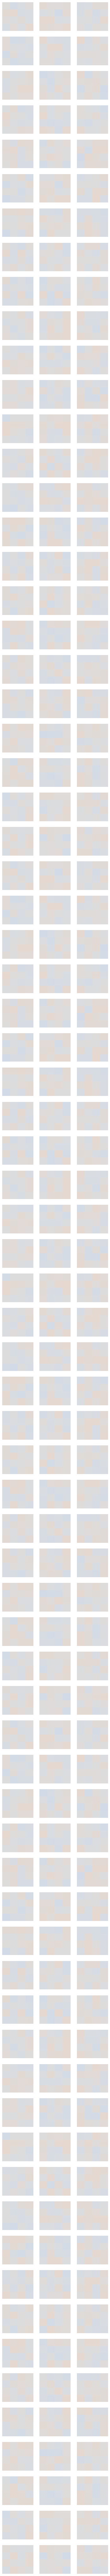

In [235]:
net = ConnectNet('DeepFour-V2')
net.load('current')

layer  = net.model.layers[1]

x = layer.get_weights()

weights = x[0]
s = weights.shape

fig = plt.figure(figsize=(s[2]*2, s[3]*2))  # width, height in inches
channel = 0
filter = 0
for i in range(s[2] * s[3]):
    sub = fig.add_subplot(s[3], s[2], i + 1)
    sub.imshow(weights[:, :, channel, filter], cmap='coolwarm', clim=(-1, 1), aspect="auto")
    plt.axis('off')
    channel = (channel + 1) % s[2]
    filter = (filter + 1) % s[3]